STOCK PRICE PREDICTION using LSTM (Apple Stocks)

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [61]:
data = pd.read_csv('APPL.csv', date_parser = True)
data.tail()

,date,close,high,low,open,volume,adjClose
1252,2021-07-29 00:00:00+00:00,145.64,146.550,144.58,144.685,54323047,145.64
1253,2021-07-30 00:00:00+00:00,145.86,146.330,144.11,144.380,70440626,145.86
1254,2021-08-02 00:00:00+00:00,145.52,146.950,145.25,146.360,62879961,145.52
1255,2021-08-03 00:00:00+00:00,147.36,148.045,145.18,145.810,64786618,147.36
1256,2021-08-04 00:00:00+00:00,146.95,147.790,146.28,147.270,56368271,146.95


In [62]:
data.head()

,date,close,high,low,open,volume,adjClose
0,2016-08-08 00:00:00+00:00,108.37,108.37,107.16,107.52,28037220,25.442098
1,2016-08-09 00:00:00+00:00,108.81,108.94,108.01,108.23,26315204,25.545397
2,2016-08-10 00:00:00+00:00,108.00,108.90,107.76,108.71,24008505,25.355233
3,2016-08-11 00:00:00+00:00,107.93,108.93,107.85,108.52,27484506,25.338799
4,2016-08-12 00:00:00+00:00,108.18,108.44,107.78,107.78,18660434,25.397492


In [63]:
data_training = data[data['date']<'2020-02-08'].copy()
data_test = data[data['date']>='2020-02-08'].copy()

In [64]:
data_training = data_training.drop(['date', 'adjClose'], axis = 1)
data_train = data_training

In [65]:
data_train

,close,high,low,open,volume
0,108.37,108.37,107.16,107.52,28037220
1,108.81,108.94,108.01,108.23,26315204
2,108.00,108.90,107.76,108.71,24008505
3,107.93,108.93,107.85,108.52,27484506
4,108.18,108.44,107.78,107.78,18660434
...,...,...,...,...,...
877,308.66,313.49,302.22,304.30,43496401
878,318.85,319.64,313.63,315.31,34154134
879,321.45,324.76,318.95,323.52,29706718
880,325.21,325.22,320.26,322.57,26356385


In [66]:
data_training.head()

,close,high,low,open,volume
0,108.37,108.37,107.16,107.52,28037220
1,108.81,108.94,108.01,108.23,26315204
2,108.00,108.90,107.76,108.71,24008505
3,107.93,108.93,107.85,108.52,27484506
4,108.18,108.44,107.78,107.78,18660434


In [67]:
scaler = MinMaxScaler()
data_training = scaler.fit_transform(data_training)
data_training

array([[0.0235951 , 0.01192995, 0.02115604, 0.02195672, 0.16513627],
       [0.02557637, 0.01449602, 0.02503998, 0.0251578 , 0.14808293],
       [0.02192903, 0.01431594, 0.02389765, 0.02732191, 0.12523942],
       ...,
       [0.98306916, 0.98608923, 0.9888965 , 0.99580703, 0.18166951],
       [1.        , 0.98816009, 0.99488234, 0.9915239 , 0.14849076],
       [0.97667507, 0.97996669, 0.98455563, 0.99062218, 0.17884013]])

In [68]:
X_train = []
y_train = []

for i in range(60, data_training.shape[0]):
    X_train.append(data_training[i-60:i])
    y_train.append(data_training[i, 0])
    
X_train, y_train = np.array(X_train), np.array(y_train)

In [69]:
X_train.shape

(822, 60, 5)

BUILDING LSTM

In [70]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow import keras
from tensorflow.keras import layers

In [73]:
regressor = Sequential()

regressor.add(LSTM(units = 60, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 5)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 120, activation = 'relu'))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

In [74]:
regressor.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_12 (LSTM)               (None, 60, 60)            15840     
_________________________________________________________________
dropout_12 (Dropout)         (None, 60, 60)            0         
_________________________________________________________________
lstm_13 (LSTM)               (None, 60, 60)            29040     
_________________________________________________________________
dropout_13 (Dropout)         (None, 60, 60)            0         
_________________________________________________________________
lstm_14 (LSTM)               (None, 60, 80)            45120     
_________________________________________________________________
dropout_14 (Dropout)         (None, 60, 80)            0         
_________________________________________________________________
lstm_15 (LSTM)               (None, 120)              

In [75]:
regressor.compile(optimizer='adam', loss = 'mean_squared_error')
regressor.fit(X_train, y_train, epochs=10,batch_size=32)

Epoch 1/10
26/26 [==============================] - 9s 169ms/step - loss: 0.0578
Epoch 2/10
26/26 [==============================] - 4s 165ms/step - loss: 0.0076
Epoch 3/10
26/26 [==============================] - 4s 166ms/step - loss: 0.0043
Epoch 4/10
26/26 [==============================] - 4s 166ms/step - loss: 0.0047
Epoch 5/10
26/26 [==============================] - 4s 167ms/step - loss: 0.0040
Epoch 6/10
26/26 [==============================] - 4s 166ms/step - loss: 0.0032
Epoch 7/10
26/26 [==============================] - 4s 165ms/step - loss: 0.0030
Epoch 8/10
26/26 [==============================] - 4s 168ms/step - loss: 0.0031
Epoch 9/10
26/26 [==============================] - 4s 163ms/step - loss: 0.0031
Epoch 10/10
26/26 [==============================] - 4s 166ms/step - loss: 0.0036


PREPARE TEST DATA SET

In [76]:
data_test.head()

,date,close,high,low,open,volume,adjClose
882,2020-02-10 00:00:00+00:00,321.55,321.55,313.85,314.18,27337215,79.635753
883,2020-02-11 00:00:00+00:00,319.61,323.90,318.71,323.60,23580780,79.155288
884,2020-02-12 00:00:00+00:00,327.20,327.22,321.47,321.47,28432573,81.035044
885,2020-02-13 00:00:00+00:00,324.87,326.22,323.35,324.19,23686892,80.457991
886,2020-02-14 00:00:00+00:00,324.95,325.98,322.85,324.74,20028447,80.477804


In [77]:
past_60_days = data_train.tail(60)

In [79]:
df = past_60_days.append(data_test, ignore_index = True)
df = df.drop(['date', 'adjClose'], axis = 1)
df.head()

,close,high,low,open,volume
0,261.96,262.79,260.92,261.55,21847226
1,264.47,264.78,261.07,261.13,25817593
2,262.64,264.88,262.10,263.75,22395556
3,265.76,265.78,263.01,263.68,25093666
4,267.10,267.43,264.23,265.80,21700897


In [80]:
inputs = scaler.transform(df)
inputs

array([[0.71519272, 0.70710845, 0.72373772, 0.71641118, 0.10383601],
       [0.72649496, 0.71606717, 0.72442312, 0.71451758, 0.14315503],
       [0.71825468, 0.71651735, 0.72912954, 0.72633003, 0.10926619],
       ...,
       [0.19087716, 0.18561203, 0.19520219, 0.19706943, 0.51018813],
       [0.19916246, 0.19054157, 0.19488234, 0.19458972, 0.52906998],
       [0.19731628, 0.1893936 , 0.19990861, 0.20117223, 0.44570208]])

In [81]:
X_test = []
y_test = []

for i in range(60, inputs.shape[0]):
    X_test.append(inputs[i-60:i])
    y_test.append(inputs[i, 0])

X_test, y_test = np.array(X_test), np.array(y_test)
X_test.shape, y_test.shape

((375, 60, 5), (375,))

In [82]:
y_pred = regressor.predict(X_test)

In [83]:
scaler.scale_

array([4.50288184e-03, 4.50186828e-03, 4.56933973e-03, 4.50856628e-03,
       9.90312045e-09])

In [84]:
scale = 1/8.18605127e-04
scale

1221.5901990069017

In [85]:
y_pred = y_pred*scale
y_test = y_test*scale

VISUALIZATION

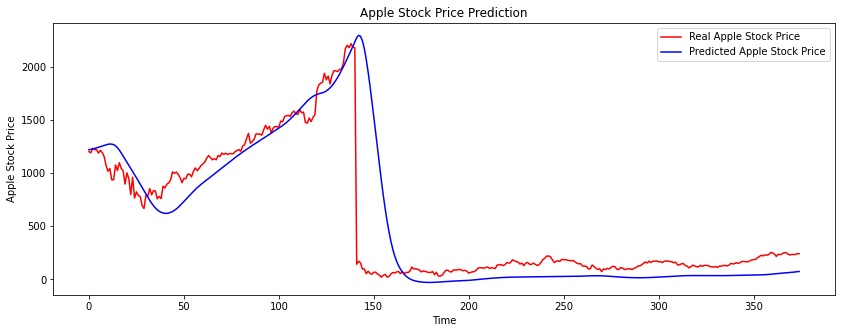

In [86]:
# Visualising the results
plt.figure(figsize=(14,5))
plt.plot(y_test, color = 'red', label = 'Real Apple Stock Price')
plt.plot(y_pred, color = 'blue', label = 'Predicted Apple Stock Price')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()